In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question
Considering the chain environment made up of 5 discrete states and 2 discrete actions, where you get a reward on 0.2 on one end of the chain and 1 at the other end.

The initial state is state 1.

Discount factor $\gamma=0.9$

![pic1](asg4.png)



## part 1-(a)

Solve using tabular Q-learning and ε-greedy.

Provide the optimal Q-values, discuss the learning rate $\alpha$ and $\epsilon$.

Here we set up the environment, by directly considering the action with state transition:

$$\#\text{State_space} = 5 \quad \#\text{Action_space} = 2$$

$$
r=\left[
\begin{matrix}
 0.2 & 0 \\
 0 & 0 \\
 0 & 0 \\
 0 & 0 \\
 0 & 1 \\
\end{matrix}
\right]\quad
a=\left[
\begin{matrix}
 2 & 1 \\
 3 & 1 \\
 4 & 1 \\
 5 & 1 \\
 5 & 1 \\
\end{matrix}
\right]
$$

where $r$ is the reward on each state under two actions , and $a$ denotes state transition result under two actions.

In [4]:
## set up the environment
N = 5
A = 2
# T = 1000 # iteration time
lamda = 0.9 # discount
r = np.array(([0, 0 ,0 ,0, 1],
             [0.2, 0, 0, 0, 0])).transpose()
a = np.array(([1,2,3,4,4],
             [0,0,0,0,0])).transpose()

### greedy baseline

First, let's do a greedy tabular Q-learning method to give a solution, where we set learning rate $\alpha=0.9$

Q-table update rule:
$$Q\left(x_{t+1}, a_{t+1}\right) \leftarrow Q\left(x_{t}, a_{t}\right)+\alpha_{t}\left[r_{t}+\gamma \max _{a^{\prime} \in \mathcal{A}} Q_{t}\left(x_{t+1}, a^{\prime}\right)-Q_{t}\left(x_{t}, a_{t}\right)\right]$$

End the iteration when $\text{SUM}(Q(x_{t+1},a_{t+1})-Q(x_{t},a_{t}))^2 \leq e$, where $e=\text{1e-20}$

In [5]:
## start with an arbitrarily Q-table Q(x,a)
q_value = np.zeros((N,A))
alpha = 0.9

residuals = 1
e = 1e-20
T = 0

while residuals > e:
    max_q = np.amax(q_value, axis=1)
    q_value_new = q_value + alpha*(r + lamda*max_q[a] - q_value)
    L2 = (q_value_new-q_value)**2
    residuals = L2.sum(axis=(0,1))
    q_value = q_value_new
    T += 1

print(f"Iteraion time: {T}")
print(f"q_value*：\n{q_value}")

Iteraion time: 257
q_value*：
[[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]


We can observe that it is converged after 257 times iteration, when $\alpha =0.9$

# ε-greedy 

Under ε-greedy condition, we have a probability of $1-\epsilon\ $ to do an action following $\max_a{Q(x,a)}$, while a probability of $\epsilon\ $ to randomly choose an action and get the $Q(x,a_r)$

So that the update rule becomes to:

$$
Q(x_{t+1},a_{t+1})=\left\{\begin{array}{lr}
Q\left(x_{t}, a_{t}\right)+\alpha_{t}\left[r_{t}+\gamma \max _{a^{\prime} \in \mathcal{A}} Q_{t}\left(x_{t+1}, a^{\prime}\right)-Q_{t}\left(x_{t}, a_{t}\right)\right],& \text{if } p \geq \epsilon \\
Q\left(x_{t}, a_{t}\right)+\alpha_{t}\left[r_{t}+\gamma Q_{t}\left(x_{t+1}, a_{r}\right)-Q_{t}\left(x_{t}, a_{t}\right)\right],& \text{otherwise}
\end{array}\right.
$$

where $a_r$ stands for the random action.

Now we set both $\epsilon$ and learning rate $\alpha$ as variables to see the convergence speed under different parameters:

In this case, we set:
$$\alpha \in [0.8,1], \quad \epsilon \in [0,0.2], \quad \Delta \leq \text{1e-5 as converge} $$

In [20]:
## Q-table iteration
def Q_learning(alpha=0.9,epsilon = 0.01):
    q_value = np.zeros((N,A))

    residuals = 1
    e = 1e-5
    T = 0
    while residuals > e:
        ep = np.random.rand()
        if ep < epsilon:
            random_q = random_select_q(q_value[a])
            q_value_new = q_value + alpha*(r + lamda*random_q - q_value)
        else:
            max_q = np.amax(q_value, axis=1)
            q_value_new = q_value + alpha*(r + lamda*max_q[a] - q_value)
        ## calculate L2 norm distance
        L2 = (q_value_new-q_value)**2
        residuals = L2.sum(axis=(0,1))
        q_value = q_value_new
        T += 1

#     print(f"Iteraion time: {T}")
#     print(f"q_value*：\n{q_value}")
    return T,q_value

## set alpha and epsilon range
alpha_range = np.arange(1,0.75,-0.05)
epsilon_range = np.arange(0,0.2,0.01)

## collect result
result_a = {}
for alpha in alpha_range:
    result_e = {}
    for epsilon in epsilon_range:
        temp = []
        for i in range(10):
            temp.append(Q_learning(alpha,epsilon)[0])
        result_e[round(epsilon,2)]= np.mean(temp)
    result_a[round(alpha,2)] = result_e
    
### collect result of iteration times
result_i = []
for i in result_a:
    result_i.append(list(result_a[i].values()))

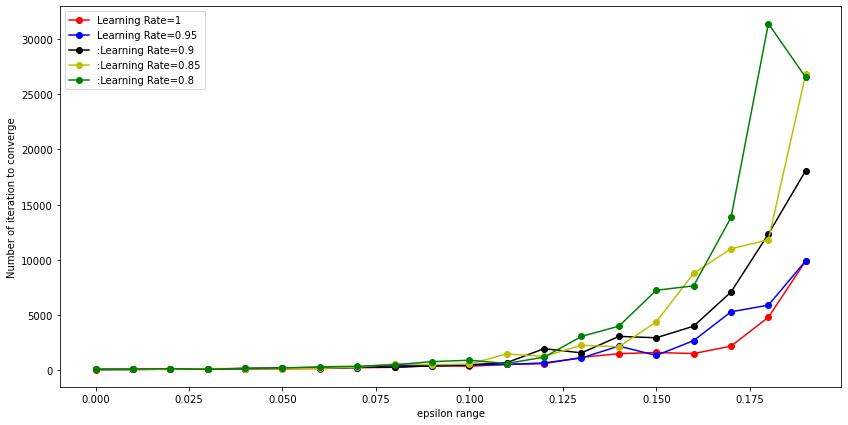

In [23]:
## plot the result
plt.figure(1,figsize=(14,7))
plt.plot(epsilon_range, result_i[0], marker='o', color='r', label='Learning Rate=1')
plt.plot(epsilon_range, result_i[1], marker='o', color='b', label='Learning Rate=0.95')
plt.plot(epsilon_range, result_i[2], marker='o', color='black', label=':Learning Rate=0.9')
plt.plot(epsilon_range, result_i[3], marker='o', color='y', label=':Learning Rate=0.85')
plt.plot(epsilon_range, result_i[4], marker='o', color='g', label=':Learning Rate=0.8')
plt.legend()
plt.xlabel('epsilon range')
plt.ylabel('Number of iteration to converge')

plt.savefig('pic11.png')
plt.show()

## Discussion
As epsilon goes high, the needed iteration time raises exponential, which means the more random actions, the more effort is required to reach convergence in this situation.

As the learning rate decreases, the number of steps required to reach convergence does not increase significantly. We judge that this is because there is no local optimal solution in this case, so even if the step length of the gradient descent becomes shorter, we can still reach the optimal point smoothly.

## part 1 (b)
Increase the size of the chain to 10 states while keeping the rewards at both end of the chain. 

Discuss the new results, in particular ε 

Now we re-set up the environment, the space is widened but the algorithm remains same.

$$\#\text{State_space} = 10 \quad \#\text{Action_space} = 2$$

$$
r=\left[
\begin{matrix}
 0.2 & 0 \\
 0 & 0 \\
 \cdots & \cdots \\
 0 & 0 \\
 0 & 0 \\
 0 & 1 \\
\end{matrix}
\right]\quad
a=\left[
\begin{matrix}
 2 & 1 \\
 3 & 1 \\
 \cdots & \cdots \\
 8 & 1 \\
 9 & 1 \\
 9 & 1 \\
\end{matrix}
\right]
$$

where $r$ is the reward on each state under two actions , and $a$ denotes state transition result under two actions. Both $r$ and $a$ is of dimension 10 x 2.

In [25]:
## (b) tabular_q_learning + epsilon_greedy
N = 10
A = 2
lamda = 0.9
r = np.array(([0, 0 ,0 ,0, 0, 0, 0, 0, 0, 1],
             [0.2, 0, 0 ,0 ,0, 0, 0, 0, 0, 0 ])).transpose()
a = np.array(([1,2,3,4,5,6,7,8,9,9],
             [0, 0 ,0 ,0, 0, 0, 0, 0, 0, 0 ])).transpose()

In [30]:
## iteration time and q_value*, alpha=0.9 and ep=0.01
print(Q_learning())

(91, array([[3.86748003, 3.68005954],
       [4.29794724, 3.48005954],
       [4.77624414, 3.48005954],
       [5.30768514, 3.48005954],
       [5.89817514, 3.48005954],
       [6.55427514, 3.48005954],
       [7.28327514, 3.48005954],
       [8.09327514, 3.48005954],
       [8.99327514, 3.48005954],
       [9.99327514, 3.48005954]]))


In [39]:
## set alpha and epsilon range
alpha_range = np.arange(1,0.75,-0.05)
epsilon_range = np.arange(0,0.2,0.01)

## collect result
result_a = {}
for alpha in alpha_range:
    result_e = {}
    for epsilon in epsilon_range:
        temp = []
        for i in range(10):
            temp.append(Q_learning(alpha,epsilon)[0])
        result_e[round(epsilon,2)]= np.mean(temp)
    result_a[round(alpha,2)] = result_e
    
### collect result of iteration times
result_i = []
for i in result_a:
    result_i.append(list(result_a[i].values()))

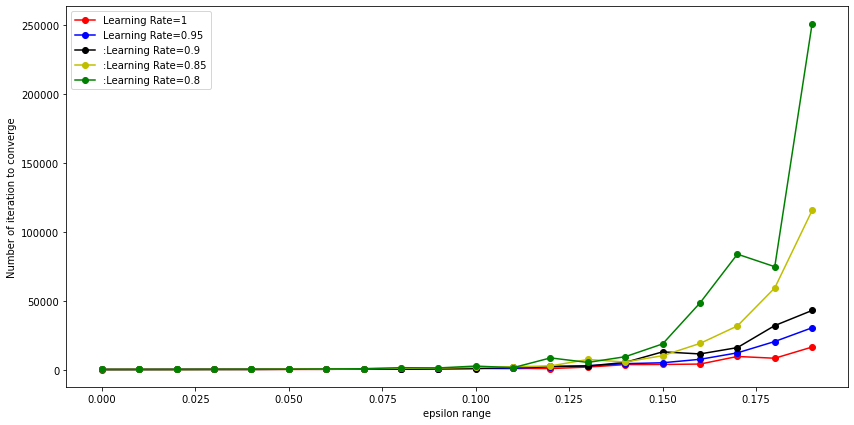

In [40]:
## plot the result
plt.figure(1,figsize=(14,7))
plt.plot(epsilon_range, result_i[0], marker='o', color='r', label='Learning Rate=1')
plt.plot(epsilon_range, result_i[1], marker='o', color='b', label='Learning Rate=0.95')
plt.plot(epsilon_range, result_i[2], marker='o', color='black', label=':Learning Rate=0.9')
plt.plot(epsilon_range, result_i[3], marker='o', color='y', label=':Learning Rate=0.85')
plt.plot(epsilon_range, result_i[4], marker='o', color='g', label=':Learning Rate=0.8')
plt.legend()
plt.xlabel('epsilon range')
plt.ylabel('Number of iteration to converge')

plt.savefig('pic12.png')
plt.show()

## Discussion
The result is similiar to (a). 
The influence of the change of $epsilon$ on the number of iterations required for convergence is far greater than the influence of the change of the learning rate. Moreover, as the total number of states increases, this influence is further increased.

### part 2 (a)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np
import time

def q_learning_nn(env, learning_rate=1.0, num_episodes=1000):
    # create the nn model
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(batch_input_shape=(1, 10)))
    model.add(layers.Dense(64, activation='sigmoid'))
    model.add(layers.Dense(2, activation='linear'))
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate))
    # q learning
    batch_size = 32
    lamda = 0.9
    epsilon = 0.7
    decay_factor = 0.999
    avg_reward_list = []
    
    for i in range(num_episodes):
        state = env.reset()
        epsilon *= decay_factor
        if i % 10 == 0:
            print("Episode {} of {}".format(i + 1, num_episodes))
        done = False
        reward_sum = 0
        X = []
        y = []
        size = 0
        while not done:
            state_vector = np.eye(10)[state:state + 1]
            Q_value = model.predict(state_vector)
            if np.random.rand() < epsilon:
                a = np.random.randint(2)
#                 a = 0
            else:
                a = np.argmax(Q_value)
            new_state, reward, done, _ = env.step(a)
            BK = reward + lamda * np.max(model.predict(np.eye(10)[new_state:new_state + 1]))
            Q_star = Q_value[0]
            Q_star[a] = BK
#             model.fit(state_vector, Q_star.reshape(-1, 2), epochs=1, verbose=0)
            state = new_state
            reward_sum += reward
            
            X.append(state_vector)
            y.append(Q_star.reshape(-1, 2))
            size += 1
            # batch
            if size == batch_size:
                for j in range(batch_size):
                    model.fit(X[j], y[j], epochs=1, verbose=0)
                X = []
                y = []
                size = 0
            
        avg_reward_list.append(reward_sum / num_episodes)
        
        if i % 10 == 0:
            print("Episode {} of {} FINISHED!".format(i + 1, num_episodes))
    plt.plot(avg_reward_list)
    plt.title('Average Reward Plot')
    plt.ylabel('Average reward per episode')
    plt.xlabel('Number of episodes')
    plt.savefig("avg_reward2.png", dpi = 100)
    plt.show()
    for i in range(10):
        print("| State {} - action {} |".format(i, model.predict(np.eye(10)[i:i + 1]).ravel()))
    return model

In [ ]:
class MDP:
    def __init__(self):
        self.reward = np.array(([0, 0 ,0 ,0, 0, 0, 0, 0, 0, 1],
                           [0.2, 0, 0 ,0 ,0, 0, 0, 0, 0, 0])).transpose()
        self.state = 0
        self.count = 0
    
    def reset(self):
        self.state = 0
        self.count = 0
        return self.state
    
    def step(self, action):
        done = False
        step = 1000
        
#         print("State {}".format(self.state))
        reward = self.reward[self.state][action]
        if action == 0 :
            self.state = np.array(([1,2,3,4,5,6,7,8,9,9]))[self.state]
        elif action == 1:
            self.state = 0
        
        self.count += 1
        if self.count > step:
            done = True
        else:
            done
#         print("New State {}".format(self.state))
#         print("Reward {}".format(reward))
        return self.state, reward, done, []

In [ ]:
if __name__ == '__main__':
    time_start=time.time()
    env = MDP()
    model = q_learning_nn(env)
    time_end=time.time()
    print('time cost',time_end-time_start,'s')